#### Notebook 2: Exploratory Data Analysis

Exploring the data.

In this notebook, I will be carrying out some exploratory data analysis to gather some useful insights about my dataset. I will also plot the distribution of the data to support my findings and understanding.

A summary of key findings is noted at the end of the notebook.

#### __Notebook Contents__

__2.1__ Exploratory Data Analyis and Distibutions

__2.2__ Distribution: Recommended(Target Variable)

__2.3__ Distribution: Airlines Reviews

__2.4__ Distribution: Overall Ratings

__2.5__ Distribution of Reviews per Year

__2.6__ Distribution of Reviews per Month

__2.7__ Exploring Text Data

__2.8__ EDA and Distribution Summary

**Importing Libraries**

In [2]:
# Main Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from wordcloud import WordCloud

#Text Data Processing
from sklearn.feature_extraction.text import CountVectorizer

%config InlineBackend.figure_format="retina"

In [3]:
#load data
cleandf = joblib.load('../data/cleandf.pkl')

#### __2.1 Exploratory Data Analysis and Distributions__

In [4]:
cleandf.head()

,airline,overall,author,customer_review,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,review_year,review_month
0,Turkish Airlines,7.0,Christopher Hackley,london to izmir via istanbul first time iâ d...,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes,2019,5
1,Turkish Airlines,2.0,Adriana Pisoi,stanbul to bucharest we make our check in in ...,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,no,2019,5
2,Turkish Airlines,3.0,M Galerko,ome to prishtina via istanbul i flew with thi...,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,no,2019,5
3,Turkish Airlines,10.0,Zeshan Shah,lew on turkish airlines iad ist khi and return...,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes,2019,5
4,Turkish Airlines,1.0,Pooja Jain,mumbai to dublin via istanbul never book turk...,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,no,2019,5


In [5]:
#list of columns to explore
list(cleandf.columns)

['airline',
 'overall',
 'author',
 'customer_review',
 'cabin',
 'seat_comfort',
 'cabin_service',
 'food_bev',
 'entertainment',
 'ground_service',
 'value_for_money',
 'recommended',
 'review_year',
 'review_month']

#### __2.2 Distribution: Recommended (Target Variable)__

Understanding the distribution of the target variable provides insights into the balance of groups, which is crucial for understanding potential biases in the dataset.

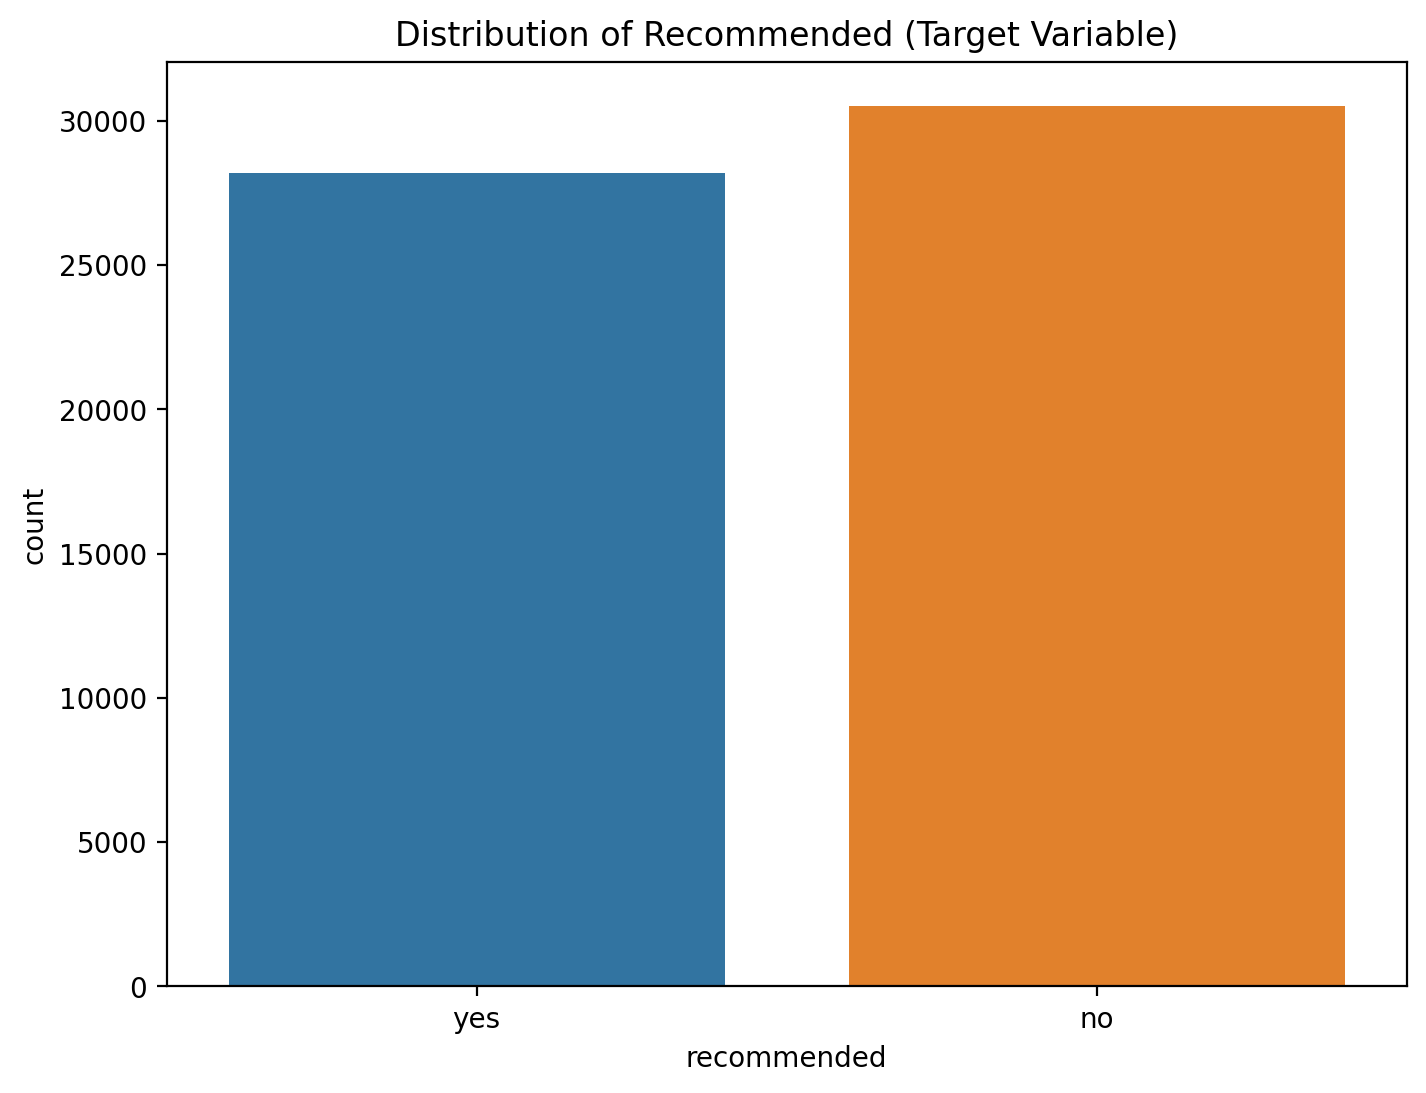

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(x='recommended', data=cleandf)
plt.title('Distribution of Recommended (Target Variable)')
plt.show()

In [7]:
cleandf['recommended'].value_counts()

no     30495
yes    28204
Name: recommended, dtype: int64

**Summary:**
- The distribution of the target variable "recommended" shows 28,204 of reviews are labeled as "yes" and 30,495 as "no."
- There is a slight imbalance between the two classes, with a `negative` bias.

This shows that there are  more passengers who would not recommend the airline services based on their experiences than those who would recommend.

This is a perfect baseline for the project as we will look into identifying specific reasons why.

**Implications for use case:**


- The slight imbalance suggests that a majority of customers express negative sentiments, which is a positive indicator for customer service.
- The imbalance could be considered when designing strategies for addressing negative feedback, aiming for more balanced sentiment distribution.

#### __2.3 Distribution: Airline Reviews__

In [8]:
#count how many airlines are in the dataset
print(f"Number of Airlines: {len(list(cleandf['airline'].unique()))}")

Number of Airlines: 81


The dataset has reviews for 81 different airlines. This makes perfect sense as the aviation indsutry is highly competitive, and 81 airlines would be nowhere near the actual total amount of active airlines operating as we speak.

**Airline Distribution Plot**

With 81 airlines, it would be difficult to visualise them all on a graph. I will focus on the **Top 15 airlines by number of reviews**.

In [9]:
# Top airlines with the most reviews
top_airlines = cleandf['airline'].value_counts().nlargest(10)


# Airlines with the most negative reviews
most_negative_airlines = cleandf[cleandf['recommended'] == 'no']['airline'].value_counts().nlargest(10)


# Airlines with the most positive reviews
most_positive_airlines = cleandf[cleandf['recommended'] == 'yes']['airline'].value_counts().nlargest(10)

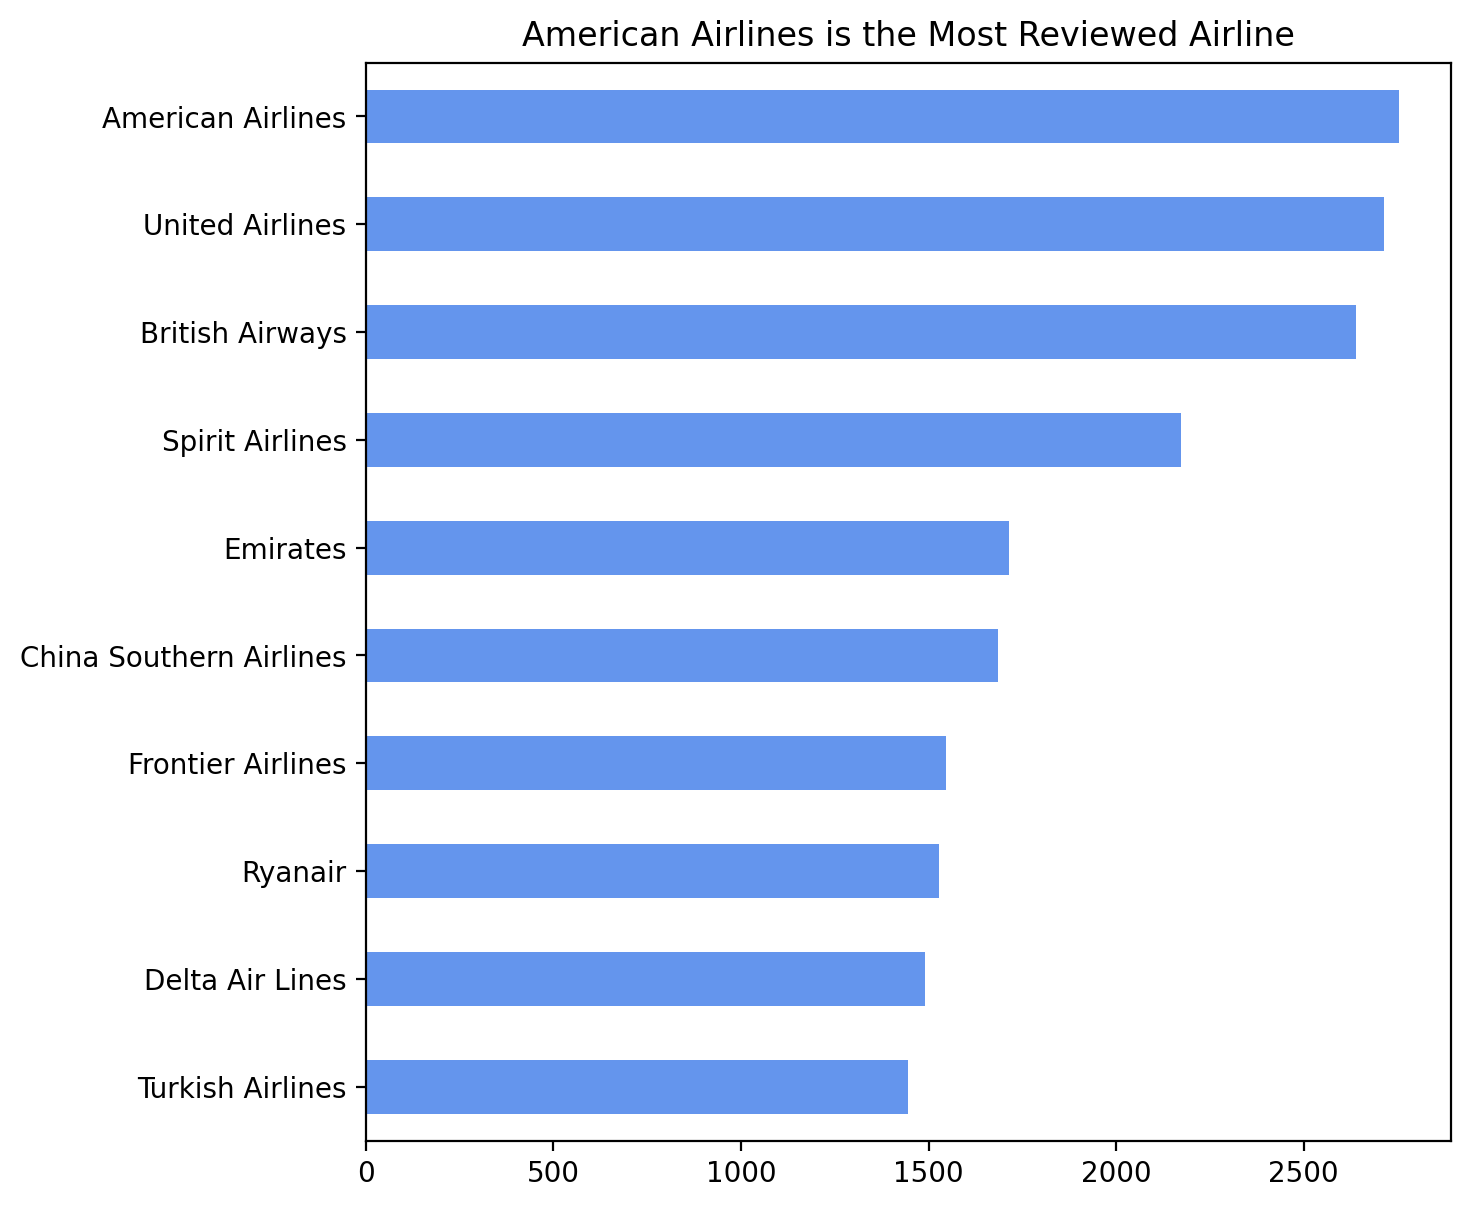

In [10]:
plt.figure(figsize=(7, 7))

top_airlines.sort_values().plot(kind='barh', color= 'cornflowerblue')
plt.title('American Airlines is the Most Reviewed Airline')
plt.show()

**Most Reviewed Airlines:**

The graph above shows me that `American Airlines` and `United Airlines` are the airlines with the highest reviews. 

Granted, this does not say much and is quite frankly open to interpretation; these could be the most hated or the most loved airlines. In addition, 2 out of the top 3 airlines by number of reviews are all American focused, with `American Airlines` and `United Airlines` gaining popularity for their domestic flights in and around the USA. 

Again, this could mean that their passengers have a lot to complain about them or better yet have a lot of praise to say about them.

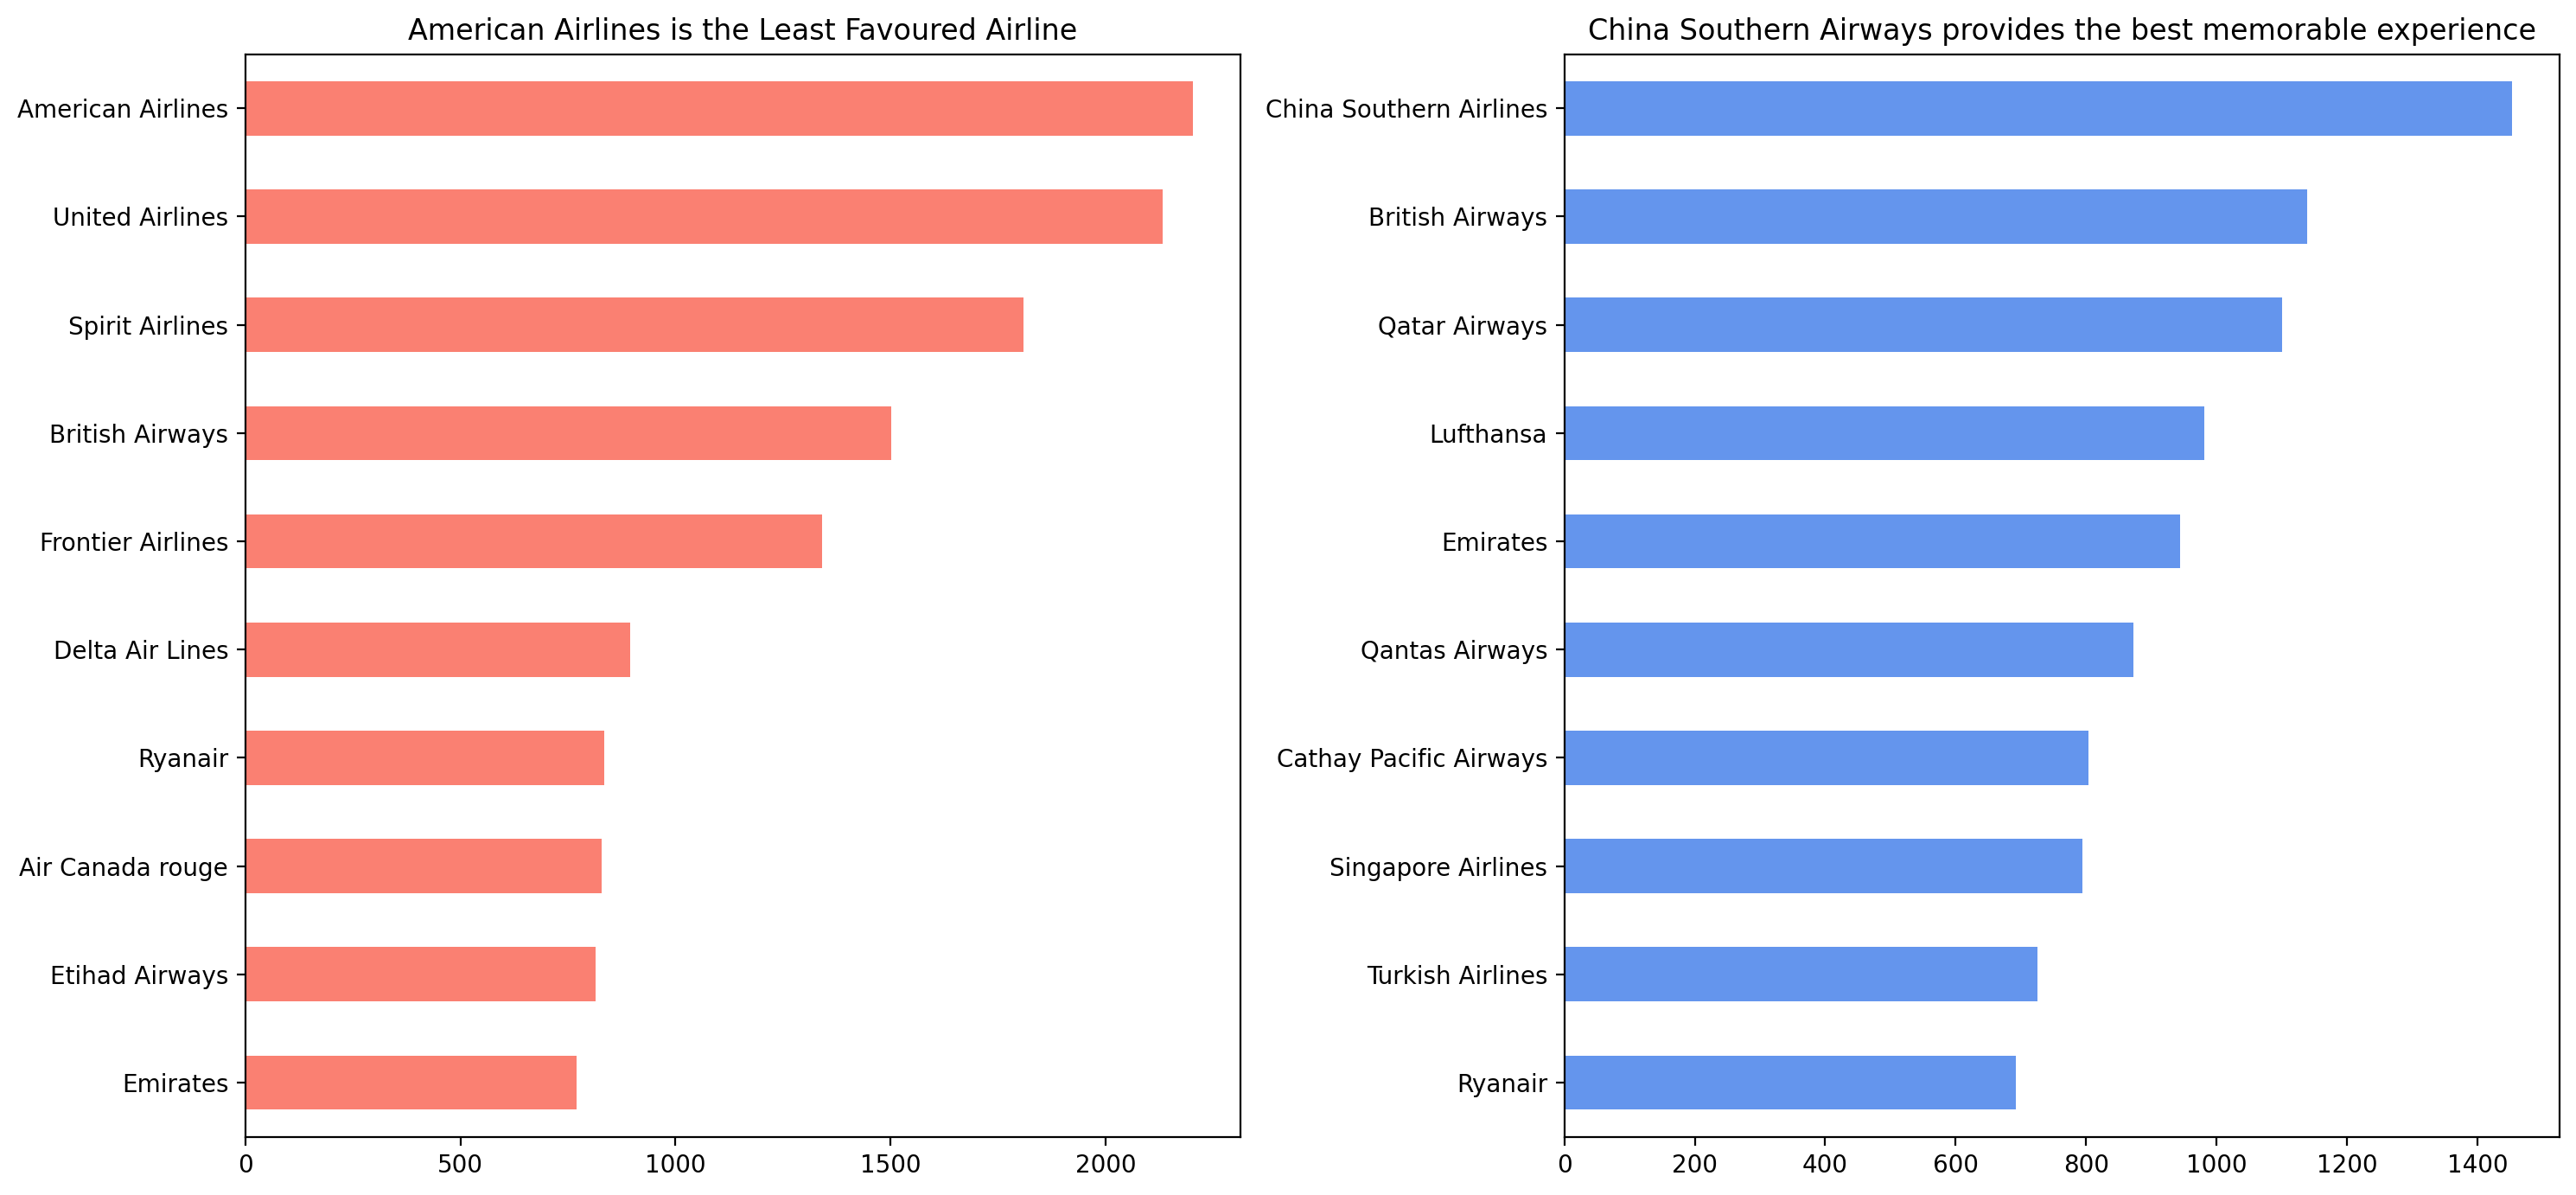

In [11]:
plt.figure(figsize=(15,7))

plt.subplot(1, 2, 1)
most_negative_airlines.sort_values().plot(kind='barh', color='salmon',)
plt.title('American Airlines is the Least Favoured Airline')

plt.subplot(1, 2, 2)
most_positive_airlines.sort_values().plot(kind='barh', color='cornflowerblue')
plt.title('China Southern Airways provides the best memorable experience')

plt.tight_layout()
plt.show()

From the graphs above, I can see that `American Arilines` is the airline with the most negative reviews and `China Southern Airlines` is the airline with the most positive reviews. So essentially, it is safe to say `American Airlines` has the most reviews as a result of most of their passengers being very unhappy with their service.

Futhermore, I noticed that the top 3 Airlines with the most negative reviews are liinked to USA, with `Spirit Airlines` and `United Airlines` being airlines which provide domestic flights around the USA. This seems to be the classic example of 'low-budget' airlines giving their passengers an average or below average standard of experience, causing the huge rise in negative reviews.

I also noticed that there are some very popular airlines such as; `British Airways`, `Emirates` and `Ryanair`. Their popularity is evident due to them being in both the top 10 positive and top 10 negative reviews. This indicates these are an example of the go-to airlines for passengers, the ones they are familiar with and are more confident in their safety due to the familiarity of the airlines.

#### __2.4 Distribution: Overall Rating__

In [12]:
#Summary stats
print(" Summary Statistics: Overall Rating")
cleandf['overall'].describe()

 Summary Statistics: Overall Rating


count    58699.000000
mean         5.102477
std          3.470780
min          1.000000
25%          1.000000
50%          5.000000
75%          9.000000
max         10.000000
Name: overall, dtype: float64

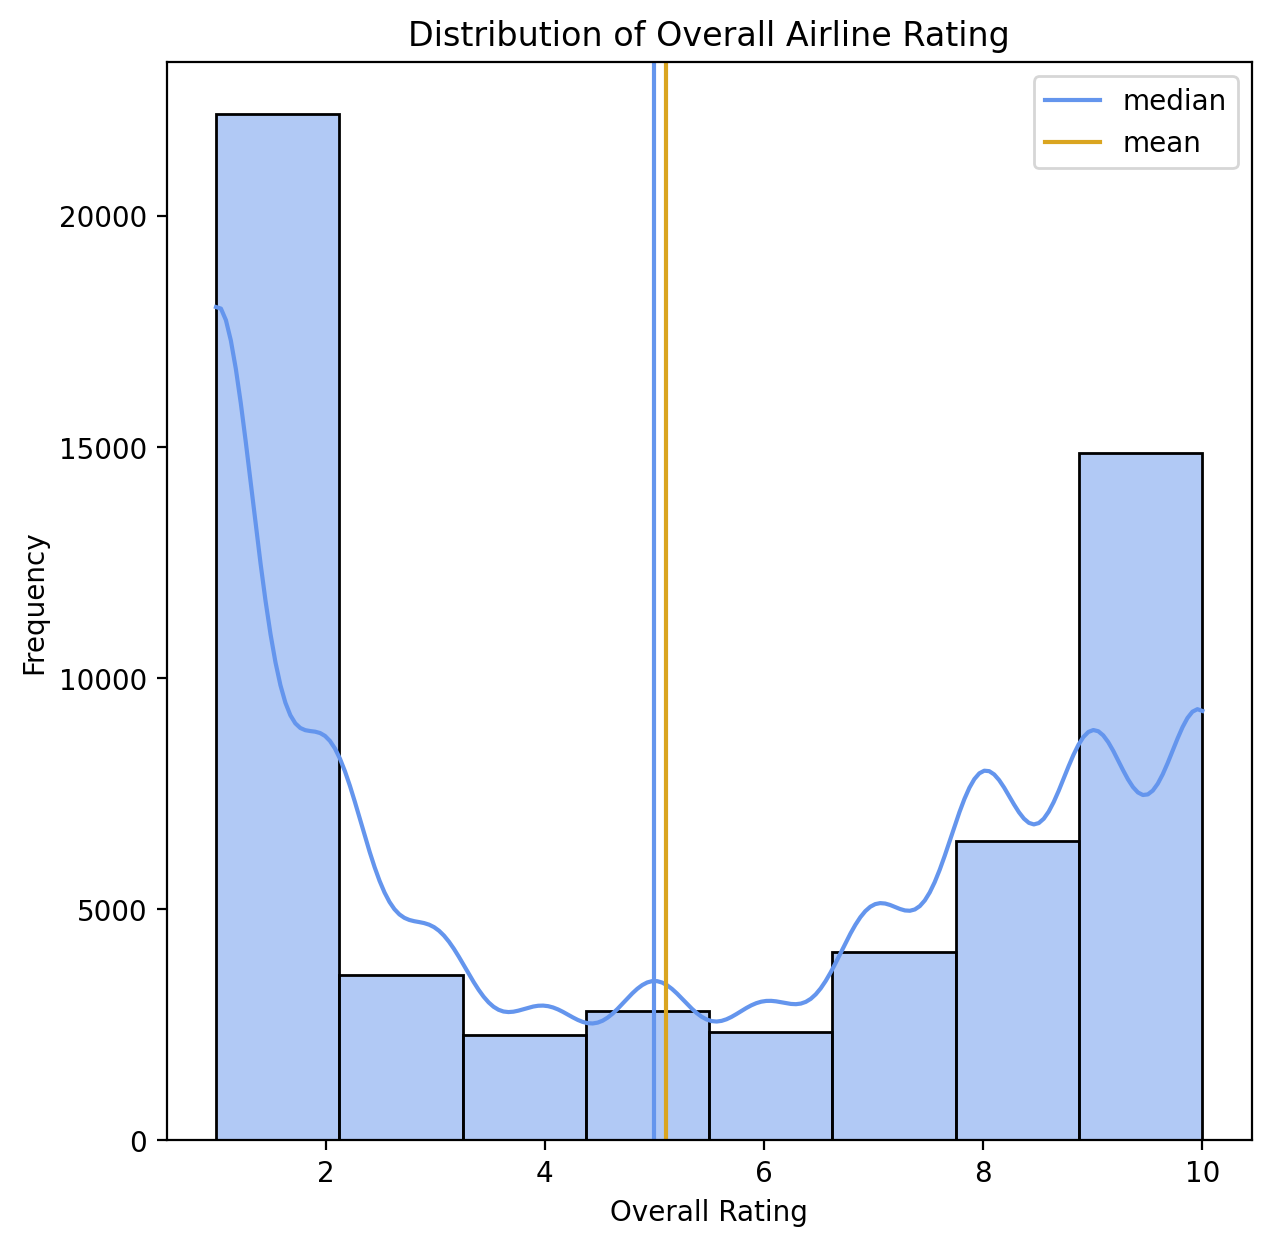

In [13]:
#plot figure
plt.figure(figsize=(7,7))
sns.histplot(data = cleandf, x='overall', bins = 8, kde = True, color = 'cornflowerblue')

plt.axvline(cleandf['overall'].median(), label='median', color='cornflowerblue')
plt.axvline(cleandf['overall'].mean(), label='mean', color='goldenrod')

plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Overall Airline Rating')
plt.legend()
plt.show()

The distribution of the overall rating looks to be bimodal, with tails forming on the opposite ends of the scale. The average overall rating stands at 5.14, which is shown by a yellow line.

The average appears to stay in the middle naturally as the review scores rande from 1 to 10. The median overall rating can be found to the left of the mean, shown by the blue line at around 5.



#### __2.5 Distribution of reviews by year__

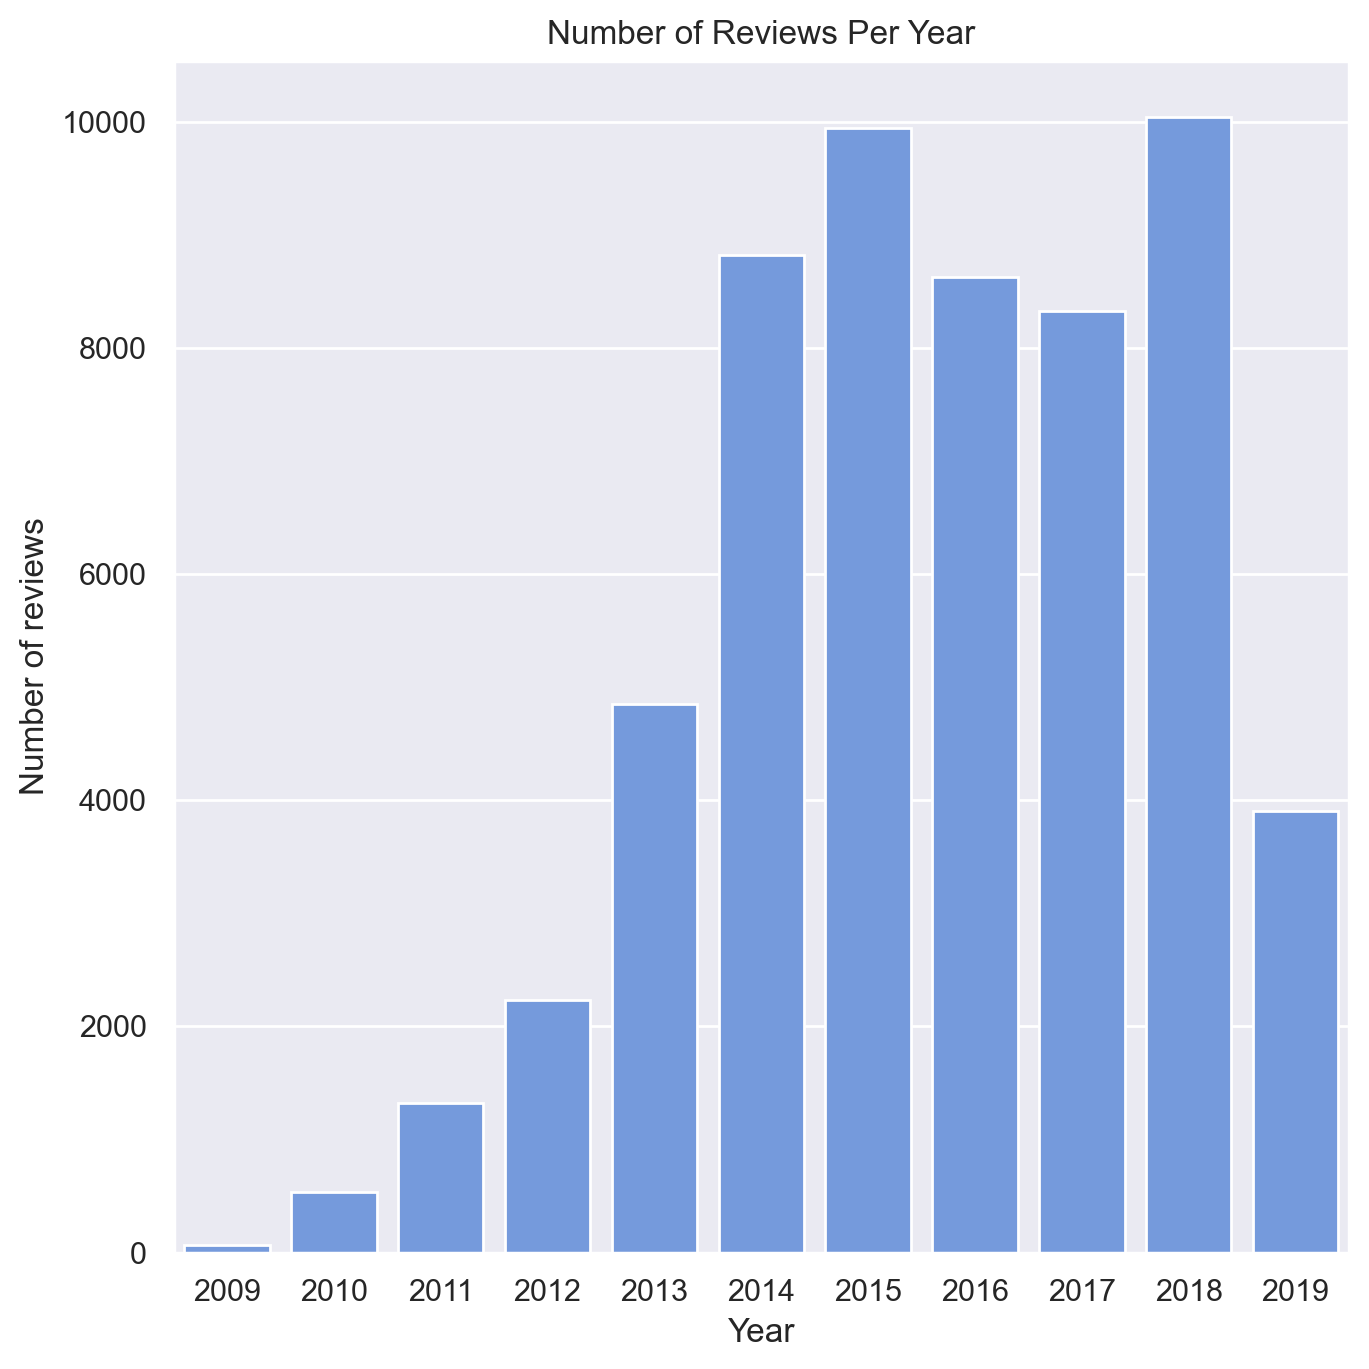

In [14]:
# plot figure
plt.figure(figsize=(7,7))
sns.set_theme(style="darkgrid")
sns.countplot(x="review_year", data=cleandf, color='cornflowerblue')
plt.xlabel("Year")
plt.ylabel("Number of reviews")
plt.title("Number of Reviews Per Year")
plt.tight_layout()
plt.show()

From 2002 to 2008, the number of reviews were pretty much non-existent, popularity of reviews became more prominent circa 2009, even at that time it was still very minimal. 

It is very possible that this is due to the unpopularity of Skytrax with the existence of TrustPilot, Yelp etc. Reviews started to pick up from 2010 onwards, although not massive spikes, but gradual growth.

Next we will explore the distribution of ratings by month.

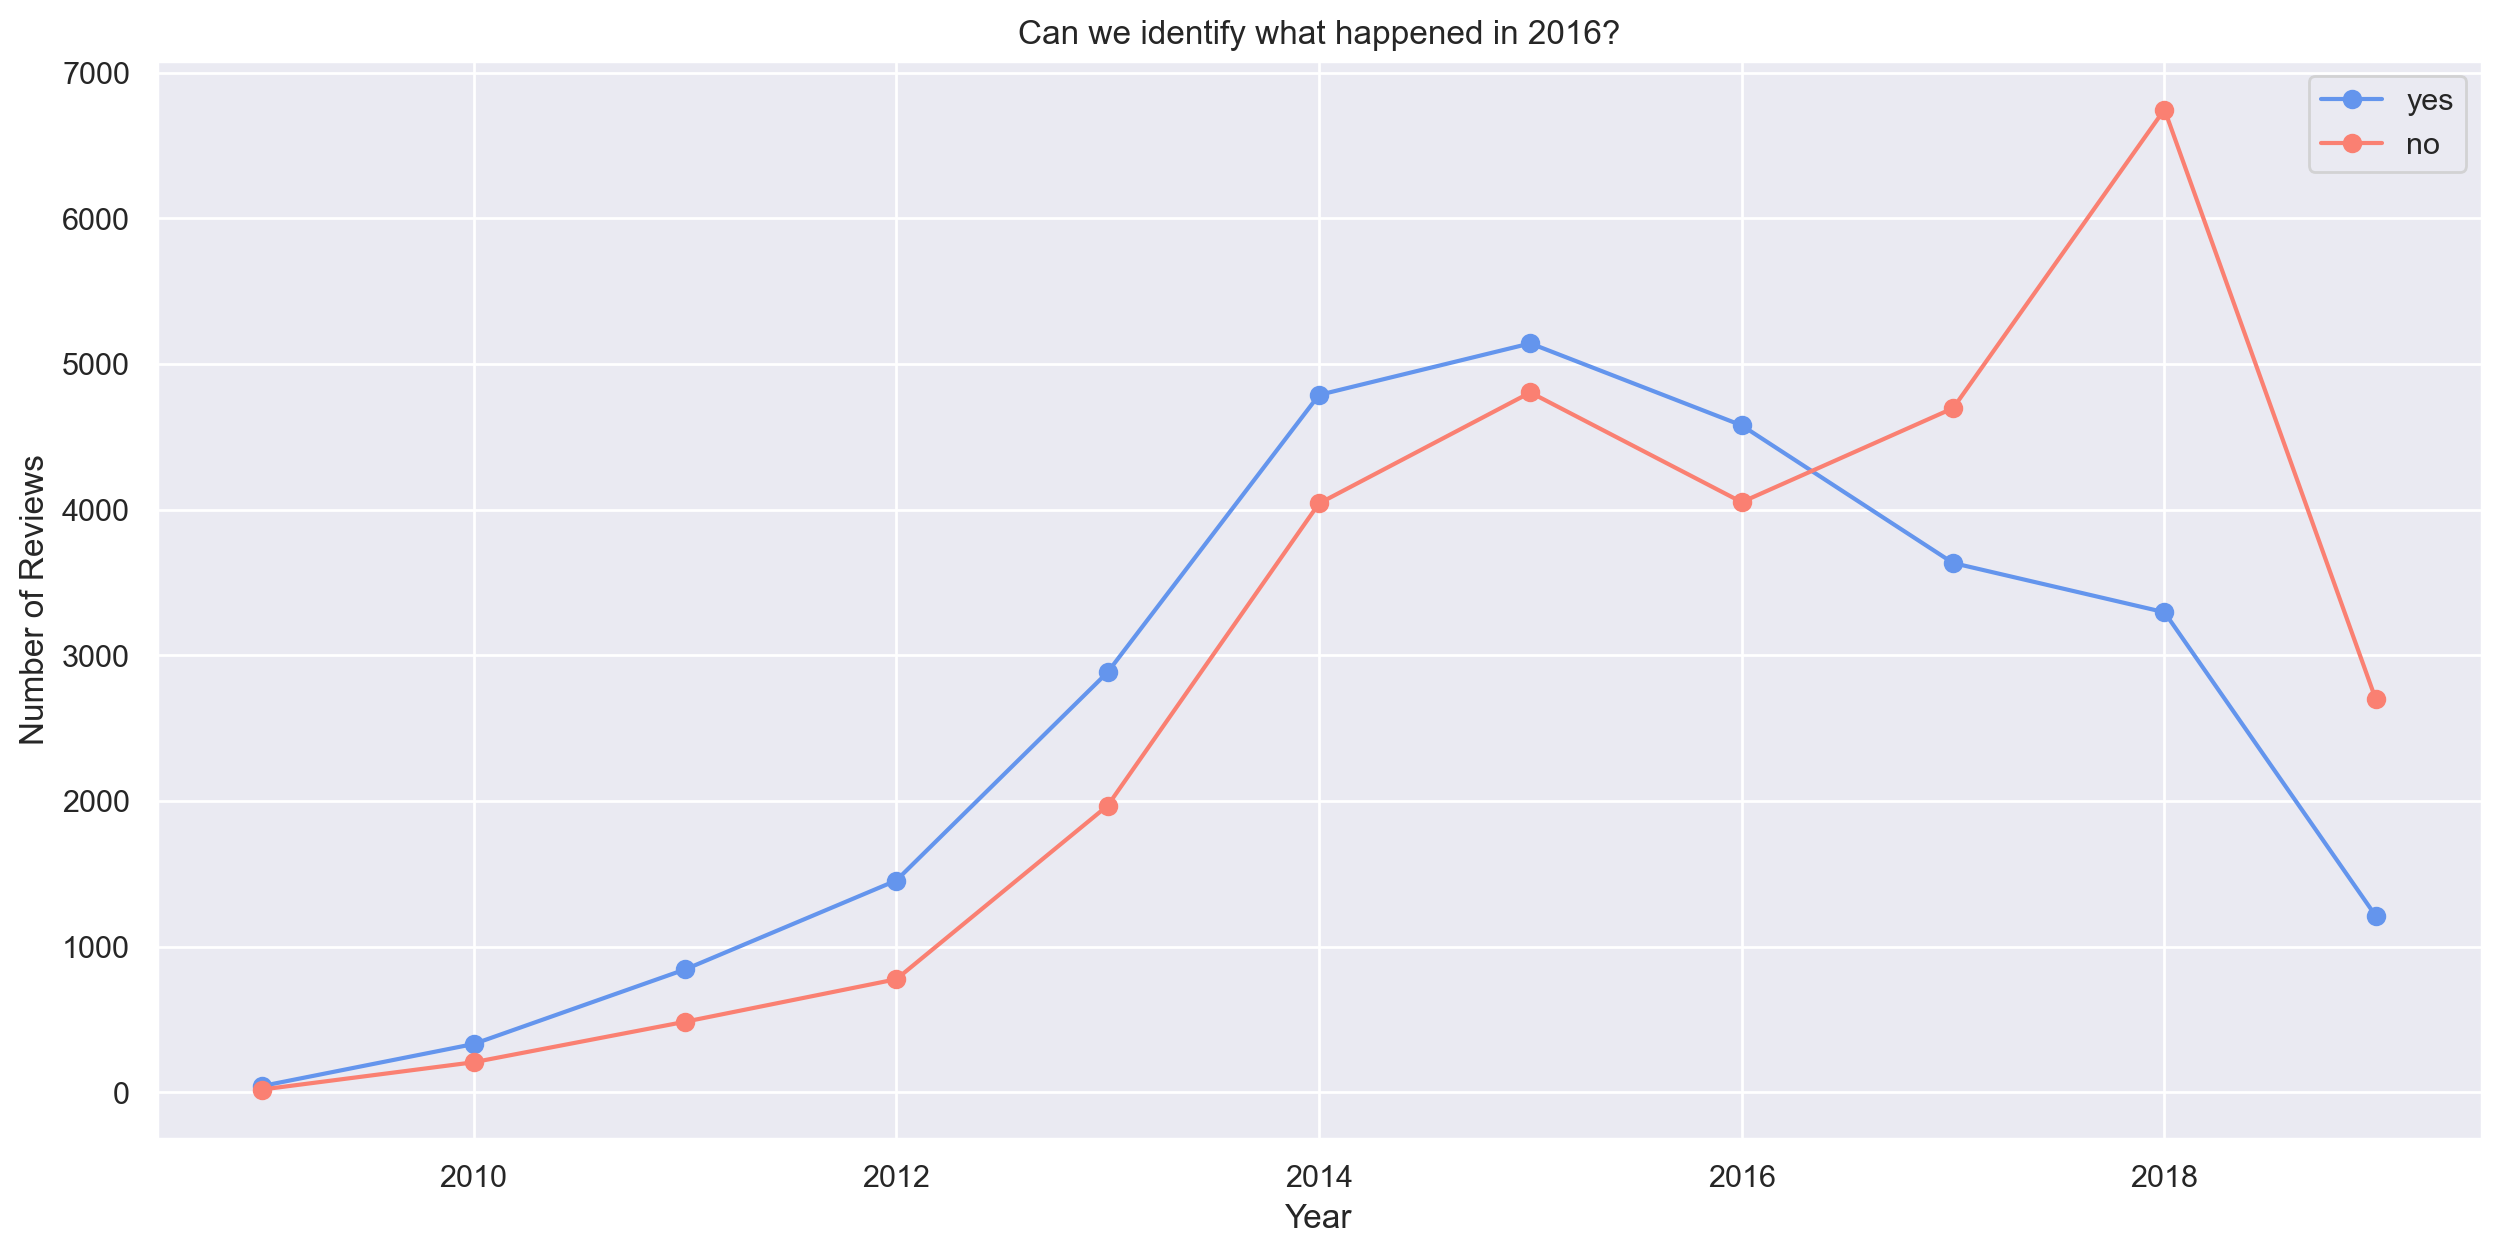

In [15]:
reviews_per_year = cleandf.groupby(['review_year', 'recommended']).size().unstack()

plt.figure(figsize=(15, 7))

reviews_per_year['yes'].plot(kind='line', color='cornflowerblue', marker= 'o')
reviews_per_year['no'].plot(kind='line', color='salmon', marker= 'o')
plt.title('Can we identify what happened in 2016?')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.legend()
plt.show()

From the chart above, we can see there was a steady increase in reviews being left after airline experiences. What is really interesting is that we can see the bimodal structure in the pattern of reviews. Both positive and negative reviews had a very similar trajectory although there were more positive reviews, the pattern was very identical. This was from 2008 until 2016, where everything changed. The positive reviews started to decline drastically, while the negative reviews sky roocketted untill 2018, where both positive and negative reviews decreased aagin.

#### __2.6 Distribution of Reviews By Month__

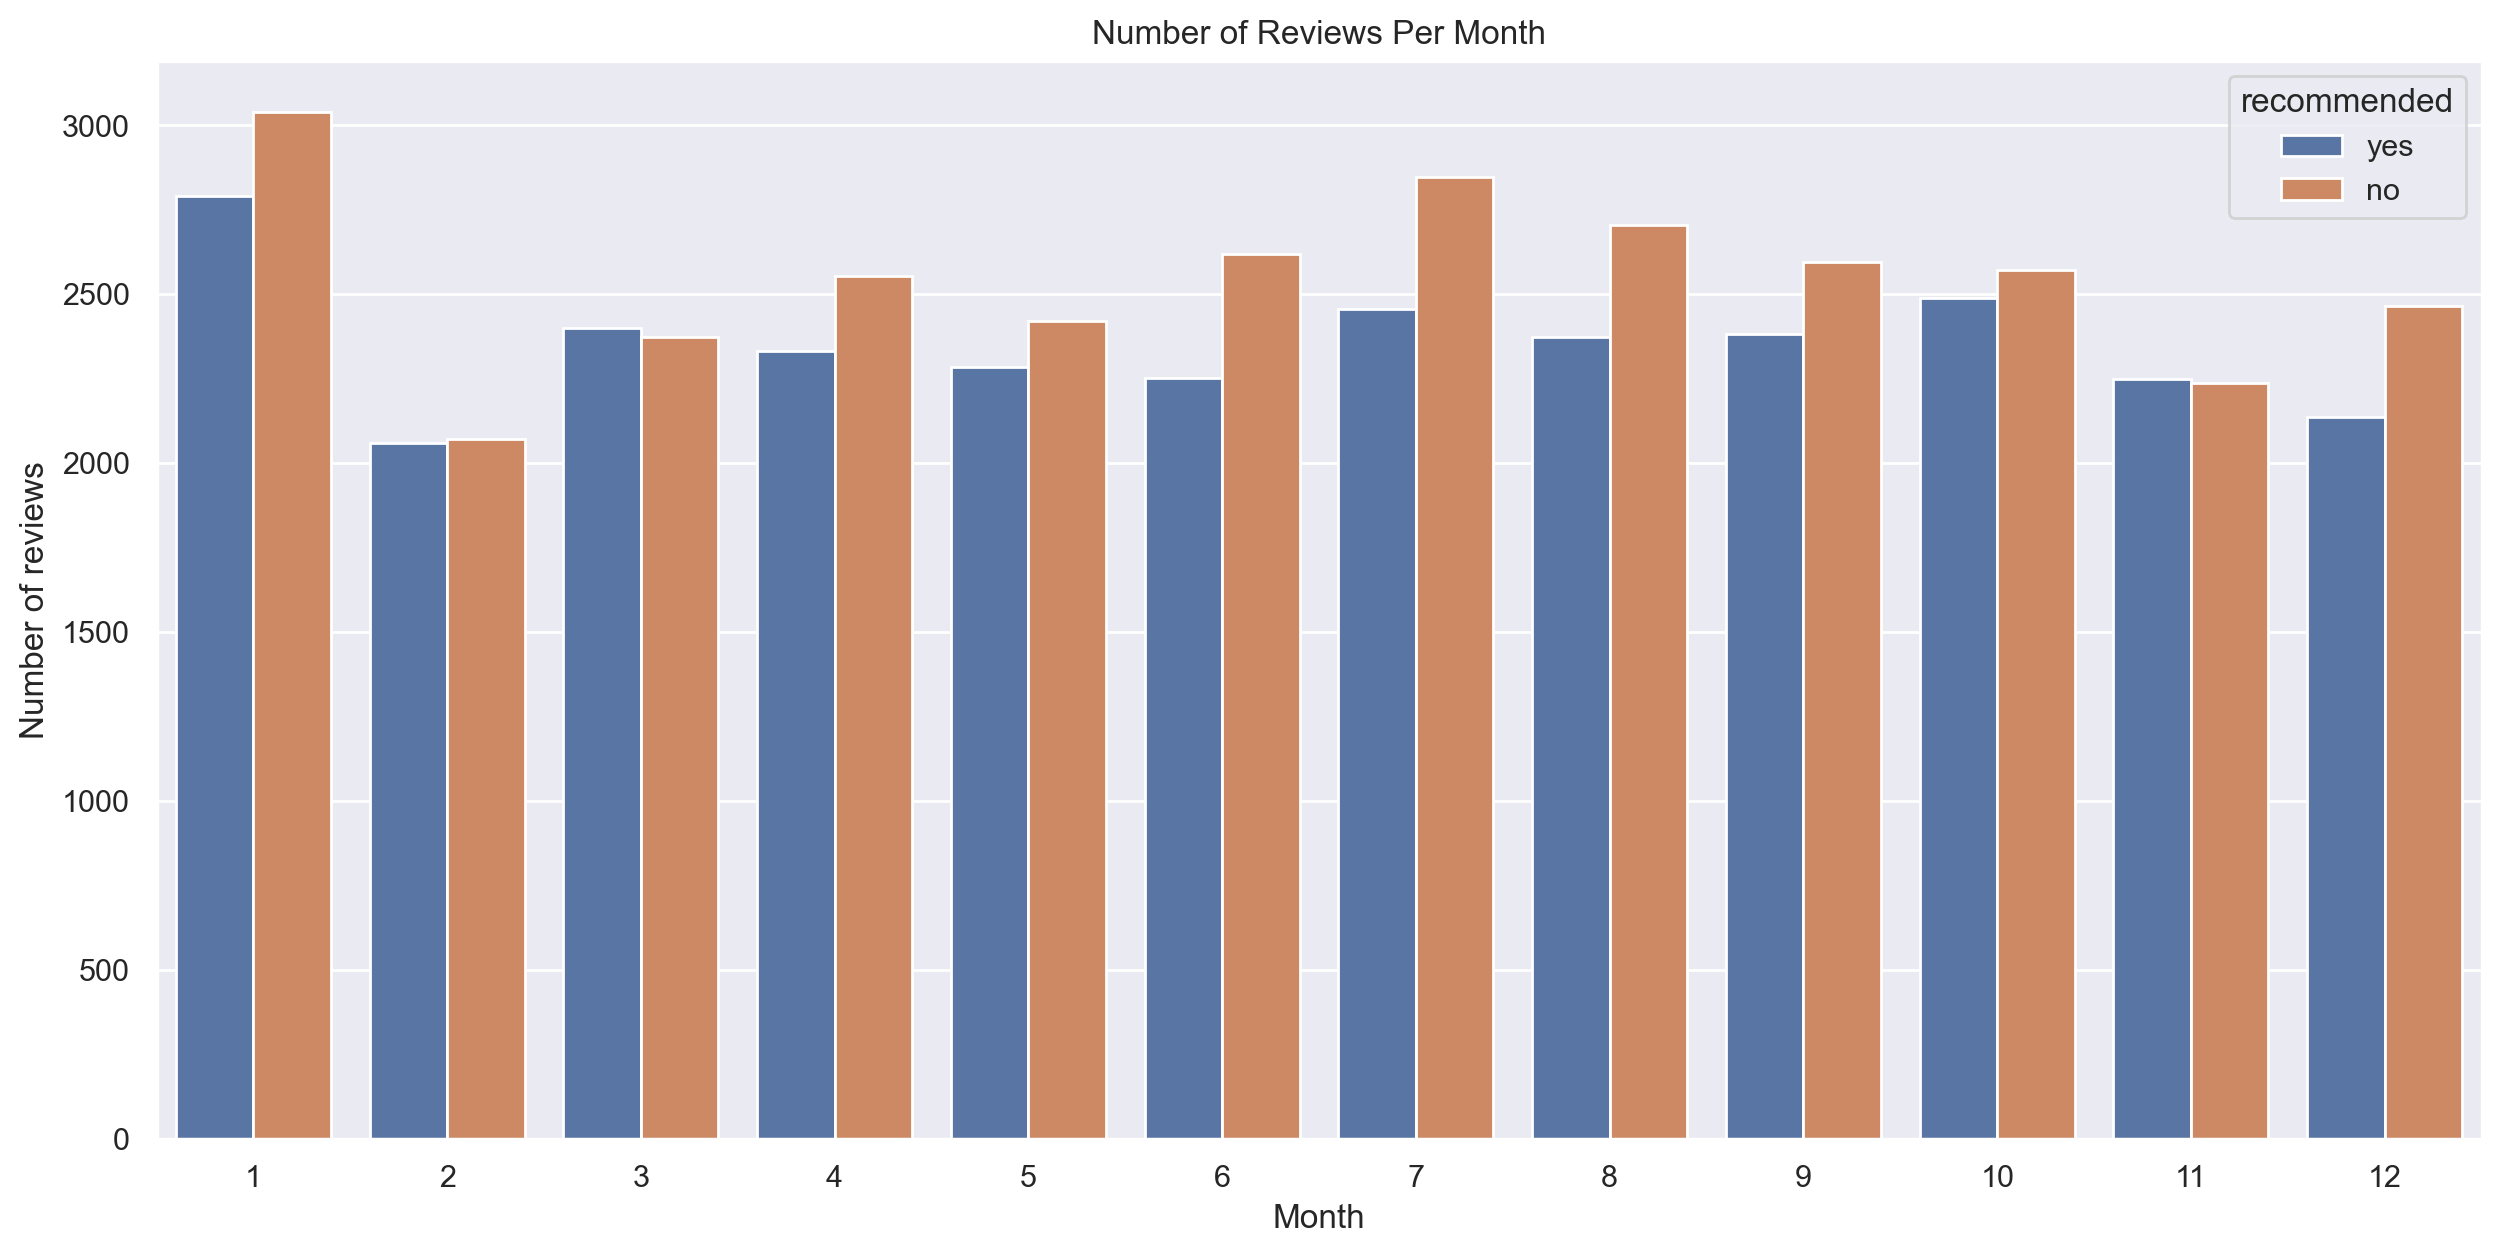

In [16]:
plt.figure(figsize=(15,7))
sns.countplot(x="review_month", data=cleandf, hue='recommended')
plt.xlabel("Month")
plt.ylabel("Number of reviews")
plt.title("Number of Reviews Per Month")
plt.show()

Looking at the month for reviews, it seems fairly even all year round, with the lowest amounts of reviews in February. 

It is possible due to the seasonal factors that affect airline operations i.e. weather preventing the regular volume of flights. If passengers cant get on a flight, they will have no experience to review about.

#### __2.7 Exploring Text Data__

As we are working with text data, we would need to explore the data that we currently have. We will look into the average length of reviews lengths, and we will also look into most frequently used tokens in reviews to get an idea of the main things passengers talk about in their reviews. This information could potentially foreshadow the feature importance from our model.

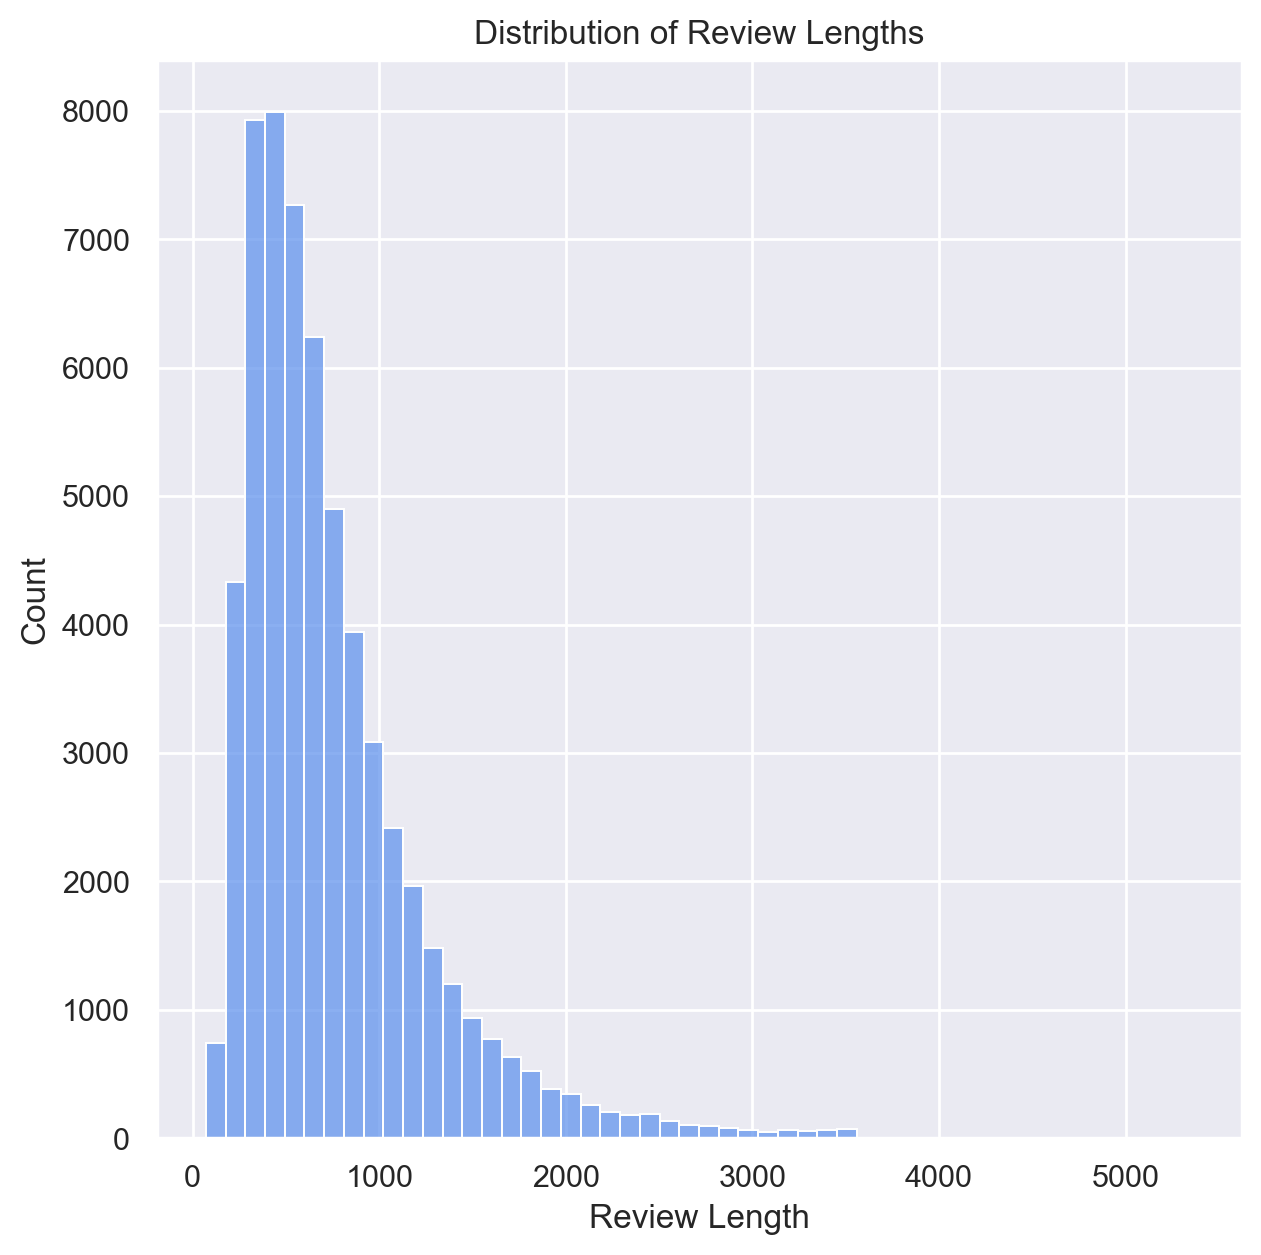

In [17]:
cleandf['review_length'] = cleandf['customer_review'].apply(len)
plt.figure(figsize=(7, 7))
sns.histplot(cleandf['review_length'], bins=50, color='cornflowerblue')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.show()

In [18]:
cleandf['customer_review'].apply(len).describe()

count    58699.000000
mean       753.869981
std        504.093933
min         71.000000
25%        410.000000
50%        618.000000
75%        938.000000
max       5356.000000
Name: customer_review, dtype: float64

**Summary:**
- The distribution of review lengths ranges from 71 to 5000+ characters.
- The average review legnth consists of approx. 753 characters

In [19]:
cleandf['review_word_count'] = cleandf['customer_review'].apply(lambda x: len(x.split()))

# Group by 'recommended' column and calculate the average review length for each group
review_length_by_sentiment = round(cleandf.groupby('recommended')['review_word_count'].mean(), 0)

**Bonus:** Word length

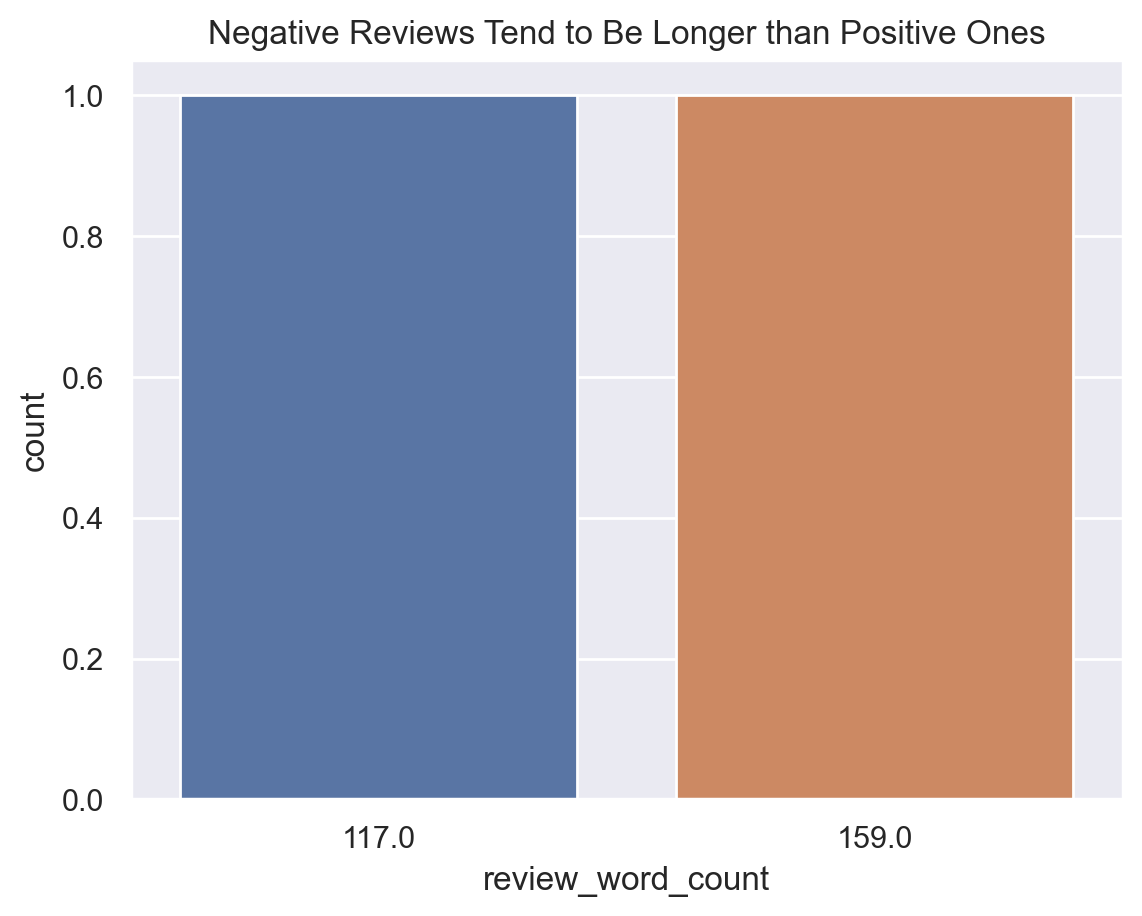

In [20]:
sns.countplot(x=review_length_by_sentiment, data=cleandf)
plt.title("Negative Reviews Tend to Be Longer than Positive Ones")
plt.show()

In [21]:
# Display the results
print(review_length_by_sentiment)

recommended
no     159.0
yes    117.0
Name: review_word_count, dtype: float64


We can see that negative reviews are longer than positive reviews. Although it is bad practice to speculate, we'd like to think that this information could become handy in further analysis when looking to identify patterns in speech to predict feeling from text.

Our next step is to look into the frequent tokenn count. As mentioned earlier, this could potentitally foreshadow and/or set expectations with what we might see later in this project with regards to important features in predicting sentiment.

We can do this by using sklearn's CountVectorizer from its `feature_extraction` library. 

In [22]:
#Instantiate Vectorizer
word_vec = CountVectorizer(max_features= 500, stop_words='english', ngram_range=(2,2))

As this vectorizer is on the raw dataset, the settings have been kept to the bare minimum. We have selected a maximum of 500 features, included engligh stopwords as well as stopwords would be most likely to appear in the frequency count, and finally, we sellected the n_gram range of (2,2). The reason for this is in relation to our use case. For this use case, we are looking to extract topics from reviews to convert into actionable insights. Unigrams (1,1) wont be able to identify these patterns. 

In [23]:
# Fit vectorizer on dataframe
vectorized_words = word_vec.fit_transform(cleandf['customer_review'])

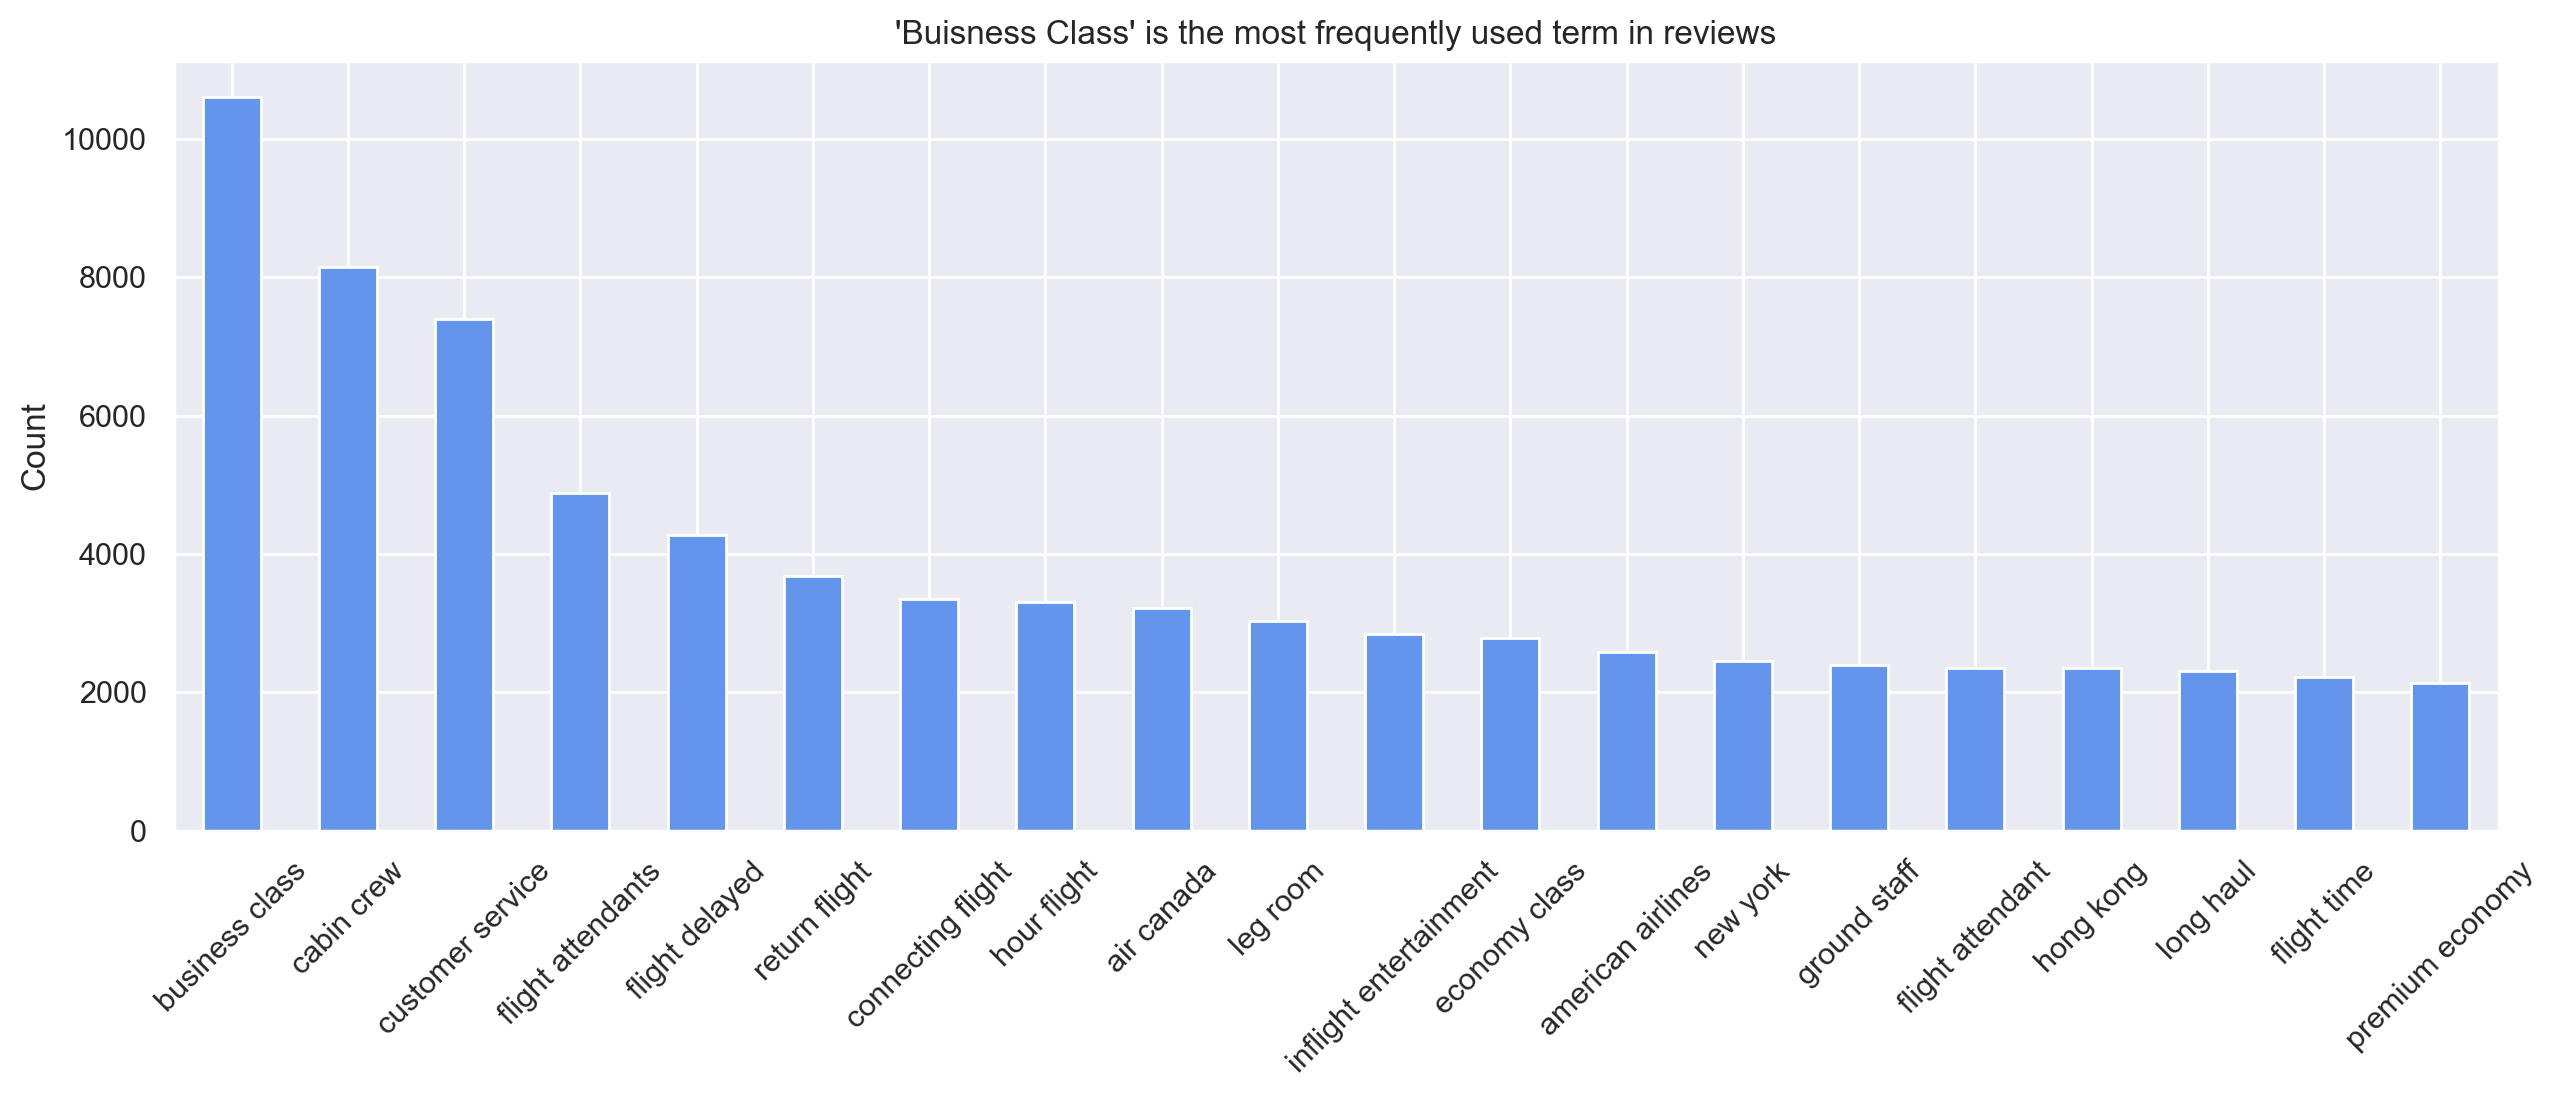

In [24]:
freq_word_count = pd.DataFrame(
    {"counts": vectorized_words.toarray().sum(axis=0)},
    index=word_vec.get_feature_names()
).sort_values("counts", ascending=False)

freq_word_count.head(20).plot(kind="bar", figsize=(15, 5), legend=False, color='cornflowerblue')
plt.title("'Buisness Class' is the most frequently used term in reviews")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

**Summary:**

- The most common words in  reviews include [business class, cabin crew, customer service, flight attendants, flight delayed, return flight].

**Implications for use case:**

- Identifying frequent terms helps us uncover specific aspects that customers appreciate or dislike (push and pull factors)

- We can tailor customer service responses to address common concerns raised by customers with the aim of meeting and/or exceeding expectations

#### __2.8 EDA and Distribution Summary__

**Airline:**

- Top 3 Airlines are based in the USA
- American Airlines is the airline with the most reviews, we  have discovered that they are mostly negative reviews.

**Overall Rating**

- A bimodal distribution, with a large group of passengers either rating at the top or the bottom of the scale.

**Distribution or Recommended**

- A lot more passengers would not recommend their airline experience in comparison to those who will

**Distribution of reviews by year**

- More reviews in the recent years in comparison to the earlier years
- 2018 had the most reviews
- Drop of positive reviews in 2016 till 2018

**Distribution of reviews by month**

- A very balanced quantity all year round
- A drop of reviews in months related to seasonality i.e. February


**Target column** 

- We have a 52-48 split with 52% of the dataset within the negative sentiment class


In the next notebook, I will be going through some more cleaning and pre-processing, with a focus on text data to build a baseline model.